In [2]:
#Necessary imports
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
# Data loading
train = pd.read_csv('../Data/train.csv').drop(columns=['id'])
test = pd.read_csv('../Data/test.csv').drop(columns=['id']) 

In [4]:
# Gather / print data shape
print(train.shape)
print(test.shape)

(58645, 12)
(39098, 11)


The data I'm using for this assignment is data on a **loan approval prediction**, where the features contain information about a requested loan, and the target is whether or not the loan was approved.

We can see from the shapes that the training set contains 58,645 rows, each with eleven different features and one boolean target. The test data contains 39,098 rows, each of which contains the eleven features and no target. This is because the code comes from a [Kaggle Competition](https://www.kaggle.com/competitions/playground-series-s4e10/overview), and the target of each test row isn't known when a solution is submitted.

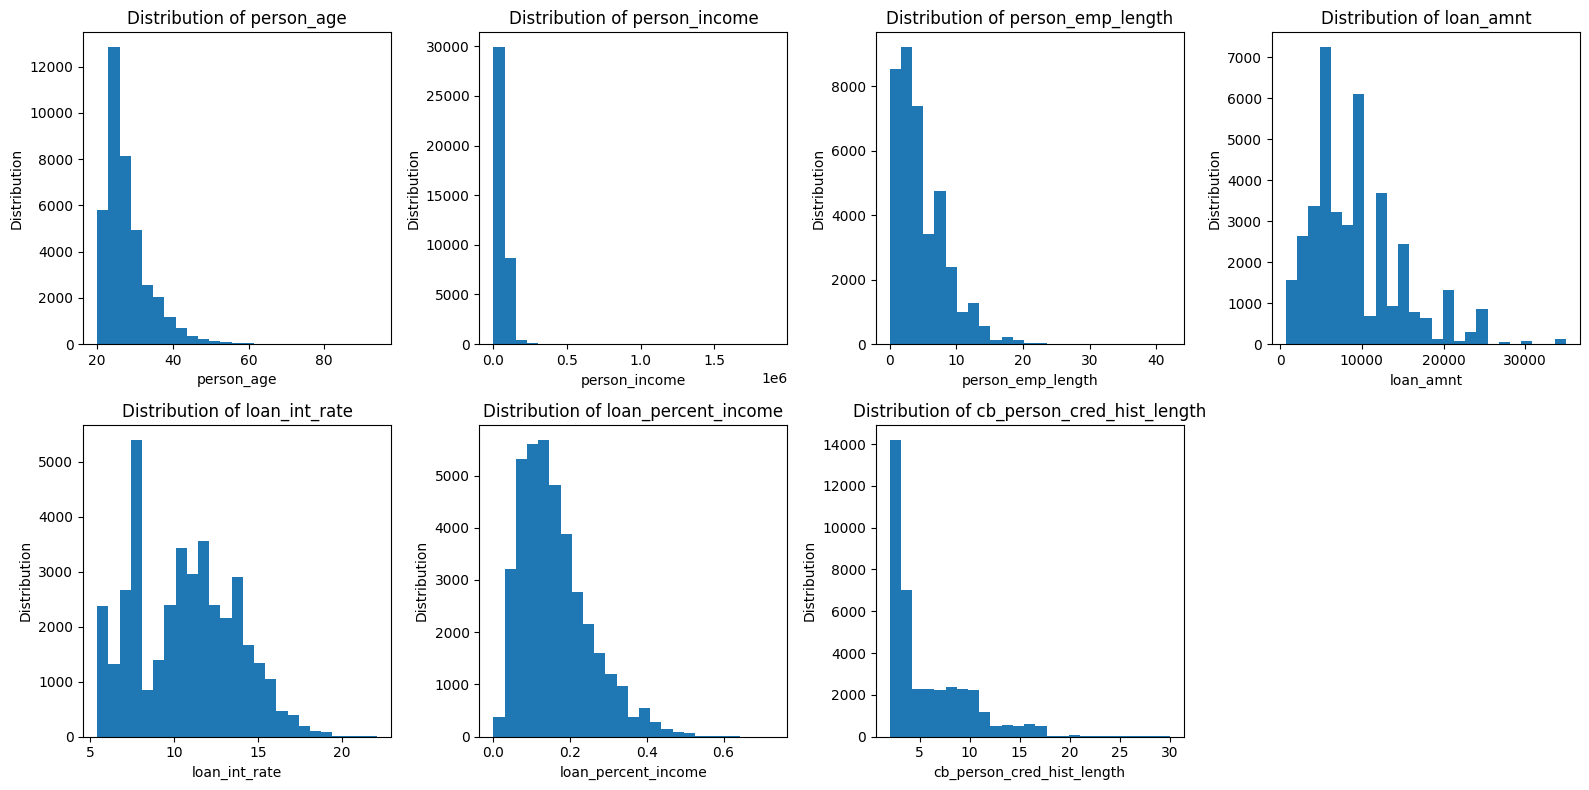

In [ ]:
# Extract all numerical features from train and test
train_numerical_data = train.select_dtypes(include=['number']).drop(columns=['loan_status'], inplace=True)
test_numerical_data = test.select_dtypes(include=['number'])
numerical_data = pd.concat([train_numerical_data,test_numerical_data],axis=0)

# Graph distribution of each numerical column
fig, axes = plt.subplots(2, 4, figsize=(16, 8))
axes = axes.ravel()

for i, col in enumerate(numerical_data.columns):
    axes[i].hist(numerical_data[col],bins=25)
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Distribution')

axes[-1].axis('off')
plt.tight_layout()
plt.show()

From this we can tell a couple of things about the numeric columns:

* Apart from some anomalies, we can see that these columns are unimodal. The only execptions to this come in the columns for loan amount and loan interest rate. These can be explained most likely by loan amounts seeming to trend towards more "friendly" numbers, and don't have much real bearing on the data.
* We can tell what these columns are measuring for the most part. They all either have something to do with statists of the person taking out the loan and statistics of the loan itself. These are all fully straightforward and make sense in the context of the problem.

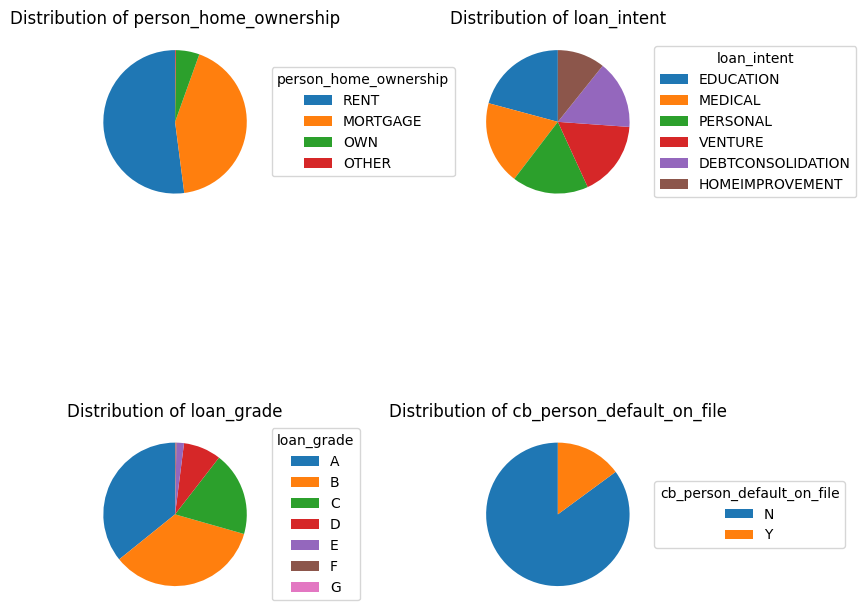

In [ ]:
# Extract all categorical features from train and test
train_categorical_data = train.select_dtypes(include=['object', 'category'])
test_categorical_data = test.select_dtypes(include=['object', 'category'])

categorical_data = pd.concat([train_categorical_data, test_categorical_data], axis=0)

# Graph pie chart distribution of each categorical column
fig, axes = plt.subplots(2, 2, figsize=(8, 8))
axes = axes.ravel()

for i, col in enumerate(categorical_data.columns):
    value_counts = categorical_data[col].value_counts()  # Get counts of each category
    axes[i].pie(value_counts, startangle=90)
    axes[i].legend(
        value_counts.index, 
        title=col, 
        loc="center left", 
        bbox_to_anchor=(1, 0, 0.5, 1)
    )
    axes[i].set_title(f'Distribution of {col}')

plt.tight_layout()
plt.show()

From this, we can tell a couple of things about the categorical columns.
* The loan intent seems very balanced, with a relatively even distribution between every possible loan type.
* The loan grade has the highest quantity in 'A' and 'B', with the count dwindling for each lower letter grade.
* Most people do not have a default on file, but a fair amount do.


The home ownership graph looks a little more interesting, so I want to find another representation to fully capture it.

In [29]:
print(categorical_data['person_home_ownership'].value_counts())

person_home_ownership
RENT        50874
MORTGAGE    41507
OWN          5194
OTHER         168
Name: count, dtype: int64


It turns out that 'OTHER' is actually a value the column can take, not an aggregation of non-listed options.

From that we can see that 'RENT' and 'MORTGAGE' are much more common, with 'OWN' a while behind, and 'OTHER' just a tiny amount.

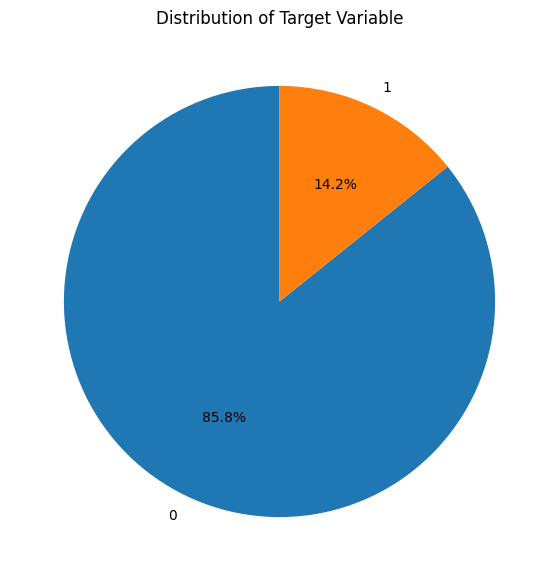

In [30]:
# Get target counts
target_counts = train['loan_status'].value_counts()

# Create a pie chart
plt.figure(figsize=(7, 7))
plt.pie(target_counts, labels=target_counts.index, autopct='%1.1f%%', startangle=90)

plt.title('Distribution of Target Variable')

plt.show()

From this, we can tell that the target data is not balanced. There's a much higher quantity of loans that aren't approved.